# Preprocessing files 


In [93]:
#!python3 -m pip install python_speech_features # Install PSF specifically on python3.
import os
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import h5py
from python_speech_features import mfcc
import matplotlib.pyplot as plt
import tracemalloc
from SerialTriggerDecoder import SerialTriggerDecoder

tracemalloc.start() # Enable memory profiling

#

## Find files, and list structure

In [4]:

# OS walk through the directory to find the files
#root_dir = '//uni.au.dk/dfs/Tech_EarEEG/Students/Msc2022_BCM_AkselStark'
root_dir = 'bcm_activity_dataset'
data = [] # Empty list to store all hdf5 files in the directory

for subdir, dirs, files in sorted(os.walk(root_dir)):
    for file in files:
        if "hdf5" in file:
            print("\n\n\n")
            # Load the hdf5 file, and append to the list
            print(file)
            
            data.append(h5py.File(os.path.join(subdir, file), 'r'))
            
            print(f'{subdir}/{file}') # Print the filename
            keylist = list(data[0].keys())
            print( keylist) # Print the keys of the hdf5 file
for i,j in enumerate(data):
    print("\n\n\n")
    print(f'Index of the hdf5 file: {i}') # Print the index of the hdf5 file
    for key in keylist:
        print(key)
        try: # Try to print the keys. If it fails, print the data
            print(f"    {list(data[i][key].keys())}")
        except:
            print("    No subkeys")
            print(f"    {np.array(data[i][key])}")
            s = data[i][key]
                        
                        
pass
            





2022-09-20_14-58-39.hdf5
bcm_activity_dataset/2022-09-20_14-58-39.hdf5
['DAQ970A', 'streaminfo']




2022-09-20_15-57-37.hdf5
bcm_activity_dataset/2022-09-20_15-57-37.hdf5
['DAQ970A', 'streaminfo']




2022-09-20_15-18-27.hdf5
bcm_activity_dataset/2022-09-20_15-18-27.hdf5
['DAQ970A', 'streaminfo']




2022-09-20_15-38-11.hdf5
bcm_activity_dataset/2022-09-20_15-38-11.hdf5
['DAQ970A', 'streaminfo']




Index of the hdf5 file: 0
DAQ970A
    ['data', 'labels']
streaminfo
    No subkeys
    [(4, b'cf_float32', 1695.5818, b'5125-240-002', b'DAQ970A', 50000, b'DAQ970A_TCPIP_192_168_56_100', b'Generic')]




Index of the hdf5 file: 1
DAQ970A
    ['data', 'labels']
streaminfo
    No subkeys
    [(4, b'cf_float32', 5233.929, b'5125-240-002', b'DAQ970A', 50000, b'DAQ970A_TCPIP_192_168_56_100', b'Generic')]




Index of the hdf5 file: 2
DAQ970A
    ['data', 'labels']
streaminfo
    No subkeys
    [(4, b'cf_float32', 2884.1384, b'5125-240-002', b'DAQ970A', 50000, b'DAQ970A_TCPIP_192_168_56_100'

## Load data, and calculate cepstrum

In [43]:
# Load data

print(f'Memory usage: {tracemalloc.get_traced_memory()[0]/1000000} MB\n')
data_bcm = []
labels_bcm = []
for file in data:
    print(f"data    {data}")
    data_full = np.array(data[0]['DAQ970A']['data'])
    data_bcm.append(data_full[:,0])
    data_bcm.append(data_full[:,1])
    print(f'Memory usage: {tracemalloc.get_traced_memory()[0]/1000000} MB\n')

    print(f"Labels    {data}")
    labels_bcm.append(data[0]['DAQ970A']['data'][:,3])
    print(f'Memory usage: {tracemalloc.get_traced_memory()[0]/1000000} MB\n')

pass

Memory usage: 4059.075812 MB

data    [<HDF5 file "2022-09-20_14-58-39.hdf5" (mode r)>, <HDF5 file "2022-09-20_15-57-37.hdf5" (mode r)>, <HDF5 file "2022-09-20_15-18-27.hdf5" (mode r)>, <HDF5 file "2022-09-20_15-38-11.hdf5" (mode r)>]
Memory usage: 1707.070726 MB

Labels    [<HDF5 file "2022-09-20_14-58-39.hdf5" (mode r)>, <HDF5 file "2022-09-20_15-57-37.hdf5" (mode r)>, <HDF5 file "2022-09-20_15-18-27.hdf5" (mode r)>, <HDF5 file "2022-09-20_15-38-11.hdf5" (mode r)>]
Memory usage: 1903.072118 MB

data    [<HDF5 file "2022-09-20_14-58-39.hdf5" (mode r)>, <HDF5 file "2022-09-20_15-57-37.hdf5" (mode r)>, <HDF5 file "2022-09-20_15-18-27.hdf5" (mode r)>, <HDF5 file "2022-09-20_15-38-11.hdf5" (mode r)>]
Memory usage: 2687.073838 MB

Labels    [<HDF5 file "2022-09-20_14-58-39.hdf5" (mode r)>, <HDF5 file "2022-09-20_15-57-37.hdf5" (mode r)>, <HDF5 file "2022-09-20_15-18-27.hdf5" (mode r)>, <HDF5 file "2022-09-20_15-38-11.hdf5" (mode r)>]
Memory usage: 2883.073942 MB

data    [<HDF5 file "2022-

In [6]:
# Create MFCC's

data_mfcc = [] # Empty list to store the mel frequency cepstral coefficients (list of numpy arrays)

for datastream in data_bcm:
    data_mfcc.append(mfcc(datastream,samplerate = 50000, nfft = 1600, winlen=0.032, winstep=0.032, numcep=16))
    print('MFCC created')
    
print(f'Memory usage: {tracemalloc.get_traced_memory()[0]/1000000} MB\n')

!!!!!!!!!!!
!!!!!!!!!!!
!!!!!!!!!!!
!!!!!!!!!!!
!!!!!!!!!!!
!!!!!!!!!!!
!!!!!!!!!!!
!!!!!!!!!!!
Memory usage: 3953.129315 MB



## Save to files

In [8]:
for i, array in enumerate(data_mfcc):
    #save the array to a numpy file
    np.save(f'data/bcm/mfcc_array{i}.npy', array)


## Plot cepstrum


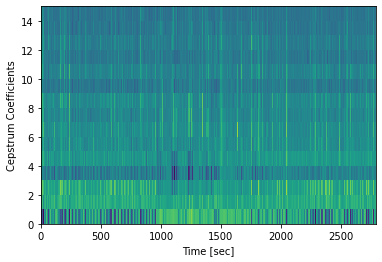

In [39]:
# Plot spectrogram
#plt.pcolormesh(t[0:20], f, np.log(spectrogram_list[segment_index]),shading='auto')
#plt.pcolormesh(np.log(data_mfcc[4][20605:20610,1:].transpose()),shading='auto')
plt.pcolormesh((data_mfcc[4][0:31*90,1:].transpose()),shading='auto')
plt.ylabel('Cepstrum Coefficients')
plt.xlabel('Time [sec]')
plt.show()

# Create the labels

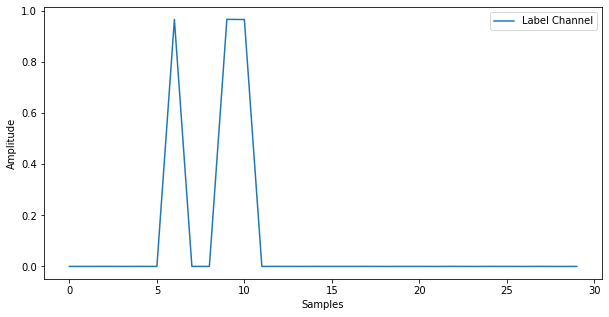

[1, 0, 1]


In [129]:
# Plot the label channel


fig = plt.figure(figsize=(10, 5))

jump = 1700*2
len = 100000
#pos = 4010000
pos = 4000000+10*50000


segment = labels_bcm[0][pos:pos+len][0::jump]



plt.plot(segment, label='Label Channel')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.legend()




plt.grid(which = 'minor')
plt.show()

#decode signal from manchester encoding
def manchester_decode(data):
    manchester_decoded = []
    for i in range(0,data.shape[0]-1,2):
        if data[i] == 0 and data[i+1] == 1:
            manchester_decoded.append(0)
        elif data[i] == 1 and data[i+1] == 0:
            manchester_decoded.append(1)
        #else:
            #manchester_decoded.append(2) #error
    return manchester_decoded
    

#print(np.rint(segment))
print(manchester_decode(np.rint(segment)))

In [99]:
decoder = SerialTriggerDecoder(fsEEG = 50000,clkSerial = 1695.5818, transError = 0.01, thrError = 0.01)

test = decoder.decode(manchester_decode([data[0]]))

TypeError: __init__() missing 1 required positional argument: 'trigger'